# Importação de Bibliotecas
Seção de Importação de Bibliotecas Necessárias para Tratamento da Base e Testes

In [2018]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Tratamento das Bases
Seção de Limpeza das Bases de Dados

In [2019]:
# Leitura e Criação de DF's

df_category = pd.read_csv('category.csv')

df_customers = pd.read_csv('customers.csv')

df_geolocation = pd.read_csv('geolocation.csv')

df_order_items = pd.read_csv('order_items.csv')

df_order_payments = pd.read_csv('order_payments.csv')

df_order_reviews = pd.read_csv('order_reviews.csv')

df_products = pd.read_csv('products.csv')

df_sellers = pd.read_csv('sellers.csv')

df_sample = pd.read_csv('sample_submission.csv')

df_teste = pd.read_csv('teste_kaggle.csv')

df_treino = pd.read_csv('treino.csv')


In [2020]:
#Área de Tratamento de df_category

df_category = df_category.rename(columns= {'product_category_name': 'categoria_produto', 'product_category_name_english': 'categoria_produto_en'})
df_category = df_category.drop_duplicates().dropna()
df_category

,categoria_produto,categoria_produto_en
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [2021]:
#Área de Tratamento de df_customers (pensar em dropar 'customer_unique_id')

df_customers = df_customers.drop(columns = {'customer_unique_id'})
df_customers = df_customers.rename(columns= {'customer_id': 'id_cliente', 'customer_zip_code_prefix': 'prefixo_cep', 'customer_city': 'cidade', 'customer_state': 'estado'})
df_customers = df_customers.drop_duplicates(subset = ['id_cliente']).dropna(subset = ['id_cliente'])
df_customers

,id_cliente,prefixo_cep,cidade,estado
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,FRANCA,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,SAO BERNARDO DO CAMPO,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,SAO PAULO,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,MOGI DAS CRUZES,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,CAMPINAS,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


In [2022]:
#Área de Tratamento de df_geolocation 

df_geolocation = df_geolocation.rename(columns= {'geolocation_zip_code_prefix': 'prefixo_cep', 'geolocation_lat': 'latitude', 'geolocation_lng': 'longitude', 'geolocation_city': 'cidade', 'geolocation_state': 'estado'})
df_geolocation = df_geolocation.drop_duplicates(subset = ['prefixo_cep']).dropna(subset = ['prefixo_cep']) #drop de duplicadas no prefixo cep, pois um cliente só pode ser relacionado a um prefixo de cep
df_geolocation

,prefixo_cep,latitude,longitude,cidade,estado
0,1037,-23.545621,-46.639292,Sao Paulo,SP
1,1046,-23.546081,-46.644820,Sao Paulo,SP
3,1041,-23.544392,-46.639499,Sao Paulo,SP
4,1035,-23.541578,-46.641607,Sao Paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [2023]:
#Área de Tratamento de df_order_items

df_order_items = df_order_items.drop(columns = ['order_item_id', 'shipping_limit_date'])
df_order_items = df_order_items.rename(columns= {'order_id': 'id_pedido', 'product_id': 'id_produto', 'seller_id': 'id_vendedor', 'price': 'preço_produto', 'freight_value': 'frete_produto'})
df_order_items

,id_pedido,id_produto,id_vendedor,preço_produto,frete_produto
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


In [2024]:
#Área de Tratamento de df_order_payments

df_order_payments = df_order_payments.drop(columns = ['payment_sequential', 'payment_type', 'payment_installments'])
df_order_payments = df_order_payments.rename(columns= {'order_id': 'id_pedido', 'payment_value': 'preço_pedido'})
df_order_payments = df_order_payments.drop_duplicates(subset = ['id_pedido']).dropna(subset = ['id_pedido'])
df_order_payments

,id_pedido,preço_pedido
0,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
3,ba78997921bbcdc1373bb41e913ab953,107.78
4,42fdf880ba16b47b59251dd489d4441a,128.45
...,...,...
103881,0406037ad97740d563a178ecc7a2075c,363.31
103882,7b905861d7c825891d6347454ea7863f,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,47.77
103884,b8b61059626efa996a60be9bb9320e10,369.54


In [2025]:
#Área de Tratamento de df_order_reviews

df_order_reviews = df_order_reviews.drop(columns = ['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'])
df_order_reviews = df_order_reviews.rename(columns= {'order_id': 'id_pedido', 'review_score': 'nota_pedido'})
df_order_reviews = df_order_reviews.drop_duplicates(subset = ['id_pedido']).dropna(subset = ['id_pedido', 'nota_pedido'])
df_order_reviews

,id_pedido,nota_pedido
1,a548910a1c6147796b98fdf73dbeba33,5.0
2,f9e4b658b201a9f2ecdecbb34bed034b,5.0
3,658677c97b385a9be170737859d3511b,5.0
4,8e6bfb81e283fa7e4f11123a3fb894f1,5.0
5,b18dcdf73be66366873cd26c5724d1dc,1.0
...,...,...
71165,f62f01ec64c6b221f926ba560907d8f7,3.0
71166,48f7ee67313eda32bfcf5b9c1dd9522d,5.0
71167,d699c734a0b1c8111f2272a3f36d398c,5.0
71168,22ec9f0669f784db00fa86d035cf8602,5.0


In [2026]:
#Área de Tratamento de df_products

df_products = df_products.drop(columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty'])
df_products = df_products.rename(columns= {'product_id': 'id_produto', 'product_category_name': 'categoria_produto', 'product_weight_g': 'peso_produto_g', 'product_length_cm': 'comprimento_produto_cm', 'product_height_cm': 'altura_produto_cm', 'product_width_cm': 'largura_produto_cm'})
df_products = df_products.drop_duplicates(subset = ['id_produto']).dropna(subset = ['id_produto'])
df_products

,id_produto,categoria_produto,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700.0,31.0,13.0,20.0


In [2027]:
#Área de Tratamento de df_sellers

df_sellers = df_sellers.rename(columns= {'seller_id': 'id_vendedor', 'seller_zip_code_prefix': 'prefixo_cep', 'seller_city': 'cidade', 'seller_state': 'estado'})
df_sellers = df_sellers.drop_duplicates(subset = ['id_vendedor']).dropna(subset = ['id_vendedor'])
df_sellers

,id_vendedor,prefixo_cep,cidade,estado
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [2028]:
#Área de Tratamento de df_sample

df_sample = df_sample.rename(columns= {'order_id': 'id_pedido', 'delivery_time (days)': 'tempo_entrega_dias'})
df_sample

,id_pedido,tempo_entrega_dias
0,e481f51cbdc54678b7cc49136f2d6af7,8.44
1,949d5b44dbf5de918fe9c16f97b45f8a,13.21
2,ad21c59c0840e6cb83a9ceb5573f8159,2.87
3,a4591c265e18cb1dcee52889e2d8acc3,16.54
4,6514b8ad8028c9f2cc2374ded245783f,9.99


In [2029]:
#Área de Tratamento de df_teste

df_teste = df_teste.drop(columns = {'order_purchase_timestamp', 'order_approved_at'})
df_teste = df_teste.rename(columns= {'order_id': 'id_pedido', 'customer_id': 'id_cliente'})
df_teste = df_teste.drop_duplicates(subset = ['id_pedido']).dropna(subset = ['id_pedido'])
df_teste

,id_pedido,id_cliente
0,6d5f4523e4747ceffd3e84b2d9bab9fc,15cae6030369d69f884089f8f746a272
1,02d2fbf1c9a20d04ceab86eb736fa22e,9befa54088a64c56bcba0c4328fdcd1d
2,dae91c4dced184f9ead8277e600b44a2,418e716dda4e353467a4f770a0bae939
3,9d138733c51598bbcd3ea81678facf91,5df2ff723d34c14ec65ed6d176c45eab
4,e7666167df3a8011289e3980afcacf13,09d2d62001804e7ae2af3c29b13cb36c
...,...,...
28147,95dda89c1cb224cddb6c5e1d81d4666c,b34d56bfad36d98cb3defe73359c7dea
28148,577b745a85120419fe27073e3c9e1a76,dc5e8db48a49602f506e67b843668d72
28149,527e7490ba8ede88db23aff0f080f5a7,5361c1b04541fb86bdb86deb42bf9d93
28150,d74cdf7dea16668a34d57964004f0e94,0d084e109d08dc18e40858b407ce7c6b


In [2030]:
#Área de Tratamento de df_treino

df_treino = df_treino[df_treino['order_status'] == 'delivered']
df_treino = df_treino.drop(columns = {'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'delivery_time_model (days)'})
df_treino = df_treino.rename(columns= {'order_id': 'id_pedido', 'customer_id': 'id_cliente', 'delivery_time (days)': 'tempo_entrega_dias'})
df_treino = df_treino.drop_duplicates(subset = ['id_pedido']).dropna(subset = ['id_pedido'])
df_treino

,id_pedido,id_cliente,tempo_entrega_dias
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.44
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.21
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2.87
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,16.54
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,9.99
...,...,...,...
68319,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,8.22
68320,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22.19
68321,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,24.86
68322,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.09


In [2031]:
#Área de Merge (Pedidos Completo + Info Produtos) --> df_order_items x df_products

df_info_produtos = df_order_items.merge(df_products, on = 'id_produto', how = 'left')

if df_info_produtos['id_pedido'].duplicated().any():
    df_info_produtos = df_info_produtos.groupby('id_pedido', as_index=False).agg({'id_produto': 'first', 'id_vendedor': 'first', 'preço_produto': 'sum', 'frete_produto': 'sum', 'categoria_produto': 'first', 'peso_produto_g': 'sum', 'comprimento_produto_cm': 'sum', 'altura_produto_cm': 'sum', 'largura_produto_cm': 'sum'})

df_info_produtos = df_info_produtos.rename(columns = {'preço_produto': 'soma_preço_produtos', 'frete_produto': 'soma_frete_produtos', 'categoria_produto': 'categoria_produtos', 'peso_produto_g': 'soma_peso_produtos_g', 'comprimento_produto_cm': 'soma_comprimento_produtos_cm', 'altura_produto_cm': 'soma_altura_produtos_cm', 'largura_produto_cm': 'soma_largura_produtos_cm'})
df_info_produtos

,id_pedido,id_produto,id_vendedor,soma_preço_produtos,soma_frete_produtos,categoria_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,utilidades_domesticas,10150.0,89.0,15.0,40.0
98662,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,informatica_acessorios,8950.0,45.0,26.0,38.0
98663,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,esporte_lazer,967.0,21.0,24.0,19.0
98664,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,informatica_acessorios,100.0,20.0,20.0,20.0


In [2032]:
#Área de Merge (Teste + Pedidos Completo) --> df_teste x df_info_produtos

df_teste = df_info_produtos.merge(df_teste, on = 'id_pedido', how = 'inner')
df_teste

,id_pedido,id_produto,id_vendedor,soma_preço_produtos,soma_frete_produtos,categoria_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,id_cliente
0,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06
1,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75,ferramentas_jardim,13805.0,35.0,75.0,45.0,9ed5e522dd9dd85b4af4a077526d8117
2,0005f50442cb953dcd1d21e1fb923495,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,53.99,11.40,livros_tecnicos,850.0,29.0,3.0,21.0,351d3cb2cee3c7fd0af6616c82df21d3
3,00063b381e2406b52ad429470734ebd5,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,45.00,12.98,fashion_bolsas_e_acessorios,200.0,16.0,16.0,11.0,6a899e55865de6549a58d2c6845e5604
4,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,74.00,23.32,cama_mesa_banho,1383.0,50.0,10.0,40.0,5d178120c29c61748ea95bac23cb8f25
...,...,...,...,...,...,...,...,...,...,...,...
28147,fff8286f77788ab8b55b2e5747fa7dd8,a2da86fa759178e9e58e54aa1a144e59,ea8482cd71df3c1969d7b9473ff13abc,24.99,15.28,telefonia,350.0,17.0,4.0,12.0,e79f494063c25f5c673222d8a2cc6f47
28148,fffbee3b5462987e66fb49b1c5411df2,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,119.85,20.03,casa_construcao,1050.0,16.0,20.0,16.0,11a0e041ea6e7e21856d2689b64e7f3a
28149,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,utilidades_domesticas,10150.0,89.0,15.0,40.0,b51593916b4b8e0d6f66f2ae24f2673d
28150,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,informatica_acessorios,8950.0,45.0,26.0,38.0,84c5d4fbaf120aae381fad077416eaa0


In [2033]:
#Área de Merge (Treino + Pedidos Completo) --> df_treino x df_info_produtos

df_treino = df_info_produtos.merge(df_treino, on = 'id_pedido', how = 'inner')
df_treino = df_treino.dropna(subset = {'tempo_entrega_dias'})
df_treino

,id_pedido,id_produto,id_vendedor,soma_preço_produtos,soma_frete_produtos,categoria_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,id_cliente,tempo_entrega_dias
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,7.61
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,16.22
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,7.95
3,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,25.11
4,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,21.90,12.69,utilidades_domesticas,450.0,24.0,8.0,15.0,816cbea969fe5b689b39cfc97a506742,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...
68313,fffb0b1a50e65c449020434fa835e078,e7be84ea9462aac5e2b0b08eb35ba7f1,36a968b544695394e4e9d7572688598f,4.90,10.96,instrumentos_musicais,100.0,60.0,16.0,11.0,46b385c6d972b73cbcf797a8b16c072d,34.79
68314,fffb2ef8874127f75b52b643880fd7e0,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,17.90,22.06,cama_mesa_banho,200.0,25.0,5.0,18.0,ca8374c00203cec663bc1eabf0aaede4,17.06
68315,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,220.00,136.76,relogios_presentes,1400.0,64.0,56.0,44.0,4d3abb73ceb86353aeadbe698aa9d5cb,21.12
68316,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,esporte_lazer,967.0,21.0,24.0,19.0,29309aa813182aaddc9b259e31b870e6,4.80


In [2034]:
#Área de Merge (Pedidos Sem Id Cliente) --> df_teste x df_order_payments

df_teste = df_teste.merge(df_order_payments, on = 'id_pedido', how = 'left')
df_teste
df_teste.fillna({'frete_total': 0}, inplace=True)
df_teste = df_teste.rename(columns={'preço_pedido': 'preço_total'})
df_teste

,id_pedido,id_produto,id_vendedor,soma_preço_produtos,soma_frete_produtos,categoria_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,id_cliente,preço_total
0,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,25.78
1,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75,ferramentas_jardim,13805.0,35.0,75.0,45.0,9ed5e522dd9dd85b4af4a077526d8117,880.75
2,0005f50442cb953dcd1d21e1fb923495,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,53.99,11.40,livros_tecnicos,850.0,29.0,3.0,21.0,351d3cb2cee3c7fd0af6616c82df21d3,65.39
3,00063b381e2406b52ad429470734ebd5,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,45.00,12.98,fashion_bolsas_e_acessorios,200.0,16.0,16.0,11.0,6a899e55865de6549a58d2c6845e5604,57.98
4,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,74.00,23.32,cama_mesa_banho,1383.0,50.0,10.0,40.0,5d178120c29c61748ea95bac23cb8f25,97.32
...,...,...,...,...,...,...,...,...,...,...,...,...
28147,fff8286f77788ab8b55b2e5747fa7dd8,a2da86fa759178e9e58e54aa1a144e59,ea8482cd71df3c1969d7b9473ff13abc,24.99,15.28,telefonia,350.0,17.0,4.0,12.0,e79f494063c25f5c673222d8a2cc6f47,40.27
28148,fffbee3b5462987e66fb49b1c5411df2,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,119.85,20.03,casa_construcao,1050.0,16.0,20.0,16.0,11a0e041ea6e7e21856d2689b64e7f3a,139.88
28149,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,utilidades_domesticas,10150.0,89.0,15.0,40.0,b51593916b4b8e0d6f66f2ae24f2673d,343.40
28150,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,informatica_acessorios,8950.0,45.0,26.0,38.0,84c5d4fbaf120aae381fad077416eaa0,386.53


In [2035]:
#Área de Merge (Pedidos Sem Id Cliente) --> df_treino x df_order_payments

df_treino = df_treino.merge(df_order_payments, on = 'id_pedido', how = 'left')
df_treino
df_treino.fillna({'frete_total': 0}, inplace=True)
df_treino = df_treino.rename(columns={'preço_pedido': 'preço_total'})
df_treino

,id_pedido,id_produto,id_vendedor,soma_preço_produtos,soma_frete_produtos,categoria_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,id_cliente,tempo_entrega_dias,preço_total
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,7.61,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,16.22,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,7.95,216.87
3,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,25.11,218.04
4,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,21.90,12.69,utilidades_domesticas,450.0,24.0,8.0,15.0,816cbea969fe5b689b39cfc97a506742,6.67,34.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68313,fffb0b1a50e65c449020434fa835e078,e7be84ea9462aac5e2b0b08eb35ba7f1,36a968b544695394e4e9d7572688598f,4.90,10.96,instrumentos_musicais,100.0,60.0,16.0,11.0,46b385c6d972b73cbcf797a8b16c072d,34.79,15.86
68314,fffb2ef8874127f75b52b643880fd7e0,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,17.90,22.06,cama_mesa_banho,200.0,25.0,5.0,18.0,ca8374c00203cec663bc1eabf0aaede4,17.06,39.96
68315,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,220.00,136.76,relogios_presentes,1400.0,64.0,56.0,44.0,4d3abb73ceb86353aeadbe698aa9d5cb,21.12,356.76
68316,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,esporte_lazer,967.0,21.0,24.0,19.0,29309aa813182aaddc9b259e31b870e6,4.80,116.85


In [2036]:
#Área de Merge (Localizações Clientes) --> df_geolocation x df_customers

df_loc_cliente = df_geolocation.merge(df_customers, on = 'prefixo_cep', how = 'left')
df_loc_cliente = df_loc_cliente.drop_duplicates(subset = 'id_cliente').dropna(subset = 'id_cliente')
df_loc_cliente['cidade'] = df_loc_cliente['cidade_x'].combine_first(df_loc_cliente['cidade_y'])
df_loc_cliente['estado'] = df_loc_cliente['estado_x'].combine_first(df_loc_cliente['estado_y'])
df_loc_cliente = df_loc_cliente.drop(columns = {'cidade_x', 'cidade_y', 'estado_x', 'estado_y'})
df_loc_cliente = df_loc_cliente.rename(columns = {'prefixo_cep': 'prefixo_cep_cliente', 'estado': 'estado_cliente', 'cidade': 'cidade_cliente', 'latitude': 'latitude_aprox_cliente', 'longitude': 'longitude_aprox_cliente'})
df_loc_cliente = df_loc_cliente[['id_cliente', 'prefixo_cep_cliente', 'estado_cliente', 'cidade_cliente', 'latitude_aprox_cliente', 'longitude_aprox_cliente']]
df_loc_cliente['estado_cliente'] = df_loc_cliente['estado_cliente'].str.upper()
df_loc_cliente['cidade_cliente'] = df_loc_cliente['cidade_cliente'].str.title()
df_loc_cliente

,id_cliente,prefixo_cep_cliente,estado_cliente,cidade_cliente,latitude_aprox_cliente,longitude_aprox_cliente
0,05b005e82f3f2dcc41b5504f00484e50,1037,SP,Sao Paulo,-23.545621,-46.639292
1,19ee522d0dd140702062bb89e4820e19,1037,SP,Sao Paulo,-23.545621,-46.639292
2,6519f59a7687a4661f7c8a7e24f28f94,1037,SP,Sao Paulo,-23.545621,-46.639292
3,9a02295e3381803554347ab4dc1ab41b,1046,SP,Sao Paulo,-23.546081,-46.644820
4,51795c9dc161dc05ef36dc8460dfa7e7,1046,SP,Sao Paulo,-23.546081,-46.644820
...,...,...,...,...,...,...
103334,62cedeefcf7566f584f0c424138b5247,99955,RS,Vila Langaro,-28.107588,-52.144019
103335,6c94244091c0ea6ecf242283e1455871,99955,RS,Vila Langaro,-28.107588,-52.144019
103336,d6991eab03850ca580267c3608a42ca6,99955,RS,Vila Langaro,-28.107588,-52.144019
103337,3ab8bc00f8740d54afc4c771fb6c7f69,99970,RS,Ciriaco,-28.345143,-51.876926


In [2037]:
#Área de Merge (Localizações Vendedores) --> df_geolocation x df_sellers

df_loc_vendedor = df_geolocation.merge(df_sellers, on = 'prefixo_cep', how = 'left')
df_loc_vendedor = df_loc_vendedor.drop_duplicates(subset = 'id_vendedor').dropna(subset = 'id_vendedor')
df_loc_vendedor['cidade'] = df_loc_vendedor['cidade_x'].combine_first(df_loc_vendedor['cidade_y'])
df_loc_vendedor['estado'] = df_loc_vendedor['estado_x'].combine_first(df_loc_vendedor['estado_y'])
df_loc_vendedor = df_loc_vendedor.drop(columns = {'cidade_x', 'cidade_y', 'estado_x', 'estado_y'})
df_loc_vendedor = df_loc_vendedor.rename(columns = {'prefixo_cep': 'prefixo_cep_vendedor', 'estado': 'estado_vendedor', 'cidade': 'cidade_vendedor', 'latitude': 'latitude_aprox_vendedor', 'longitude': 'longitude_aprox_vendedor'})
df_loc_vendedor = df_loc_vendedor[['id_vendedor', 'prefixo_cep_vendedor', 'estado_vendedor', 'cidade_vendedor', 'latitude_aprox_vendedor', 'longitude_aprox_vendedor']]
df_loc_vendedor['estado_vendedor'] = df_loc_vendedor['estado_vendedor'].str.upper()
df_loc_vendedor['cidade_vendedor'] = df_loc_vendedor['cidade_vendedor'].str.title()
df_loc_vendedor

,id_vendedor,prefixo_cep_vendedor,estado_vendedor,cidade_vendedor,latitude_aprox_vendedor,longitude_aprox_vendedor
2,e5cbe890e679490127e9a390b46bbd20,1041,SP,Sao Paulo,-23.544392,-46.639499
3,1d503743d2526f03f0c2c89540ee008c,1035,SP,Sao Paulo,-23.541578,-46.641607
11,2d34636518ba88f5349b732fcf8ba2e4,1039,SP,Sao Paulo,-23.541883,-46.639919
26,b6c6854d4d92a5f6f46be8869da3fa1a,1042,SP,Sao Paulo,-23.544874,-46.640303
27,784ba75dd9d20200c4caed3d7a77141a,1040,SP,Sao Paulo,-23.540317,-46.637355
...,...,...,...,...,...,...
19785,447d377bdb757058acb569025ee18a93,99500,RS,Carazinho,-28.289446,-52.794123
19786,b1a81260566c1bac3114a6d124413f27,99500,RS,Carazinho,-28.289446,-52.794123
19800,4fae87d32467e18eb46e4a76a0a0b9ce,99670,RS,Ronda Alta,-27.783656,-52.807832
19814,968ee78631915a63fef426d6733d7422,99700,RS,Erechim,-27.634768,-52.280294


In [2038]:
#Área de Merge (Pedidos Completos) --> df_teste x df_loc_cliente x df_loc_vendedor

df_teste = df_teste.merge(df_loc_cliente, on = 'id_cliente', how = 'left')
df_teste = df_teste.merge(df_loc_vendedor, on = 'id_vendedor', how = 'left')
df_teste

,id_pedido,id_produto,id_vendedor,soma_preço_produtos,soma_frete_produtos,categoria_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,...,prefixo_cep_cliente,estado_cliente,cidade_cliente,latitude_aprox_cliente,longitude_aprox_cliente,prefixo_cep_vendedor,estado_vendedor,cidade_vendedor,latitude_aprox_vendedor,longitude_aprox_vendedor
0,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0,...,12952.0,SP,Atibaia,-23.144923,-46.539830,14403.0,SP,Franca,-20.548228,-47.395897
1,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75,ferramentas_jardim,13805.0,35.0,75.0,45.0,...,11702.0,SP,Praia Grande,-24.017041,-46.442917,19010.0,SP,Presidente Prudente,-22.119778,-51.381675
2,0005f50442cb953dcd1d21e1fb923495,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,53.99,11.40,livros_tecnicos,850.0,29.0,3.0,21.0,...,6636.0,SP,Jandira,-23.555662,-46.895958,2274.0,SP,Saopaulo,-23.468244,-46.585031
3,00063b381e2406b52ad429470734ebd5,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,45.00,12.98,fashion_bolsas_e_acessorios,200.0,16.0,16.0,11.0,...,15910.0,SP,Monte Alto,-21.255170,-48.485702,1001.0,SP,Sao Paulo,-23.549292,-46.633559
4,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,74.00,23.32,cama_mesa_banho,1383.0,50.0,10.0,40.0,...,21810.0,RJ,Rio De Janeiro,-22.886343,-43.462052,14940.0,SP,Ibitinga,-21.766477,-48.831547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28147,fff8286f77788ab8b55b2e5747fa7dd8,a2da86fa759178e9e58e54aa1a144e59,ea8482cd71df3c1969d7b9473ff13abc,24.99,15.28,telefonia,350.0,17.0,4.0,12.0,...,30881.0,MG,Belo Horizonte,-19.897923,-44.019003,4160.0,SP,Sao Paulo,-23.623582,-46.610560
28148,fffbee3b5462987e66fb49b1c5411df2,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,119.85,20.03,casa_construcao,1050.0,16.0,20.0,16.0,...,39401.0,MG,Montes Claros,-16.717109,-43.807142,13321.0,SP,Salto,-23.190244,-47.291571
28149,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,utilidades_domesticas,10150.0,89.0,15.0,40.0,...,65077.0,MA,Sao Luis,-2.490420,-44.303287,88303.0,SC,Itajai,-26.912429,-48.677381
28150,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,informatica_acessorios,8950.0,45.0,26.0,38.0,...,81690.0,PR,Curitiba,-25.601485,-49.317700,1206.0,SP,Sao Paulo,-23.535536,-46.643052


In [2039]:
#Área de Merge (Pedidos Completos) --> df_treino x df_loc_cliente x df_loc_vendedor

df_treino = df_treino.merge(df_loc_cliente, on = 'id_cliente', how = 'left')
df_treino = df_treino.merge(df_loc_vendedor, on = 'id_vendedor', how = 'left')
df_treino

,id_pedido,id_produto,id_vendedor,soma_preço_produtos,soma_frete_produtos,categoria_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,...,prefixo_cep_cliente,estado_cliente,cidade_cliente,latitude_aprox_cliente,longitude_aprox_cliente,prefixo_cep_vendedor,estado_vendedor,cidade_vendedor,latitude_aprox_vendedor,longitude_aprox_vendedor
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,...,28013.0,RJ,Campos Dos Goytacazes,-21.758076,-41.312633,27277.0,RJ,Volta Redonda,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,...,15775.0,SP,Santa Fe Do Sul,-20.212393,-50.941471,3471.0,SP,Sao Paulo,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,...,35661.0,MG,Pará De Minas,-19.860439,-44.597972,37564.0,MG,Borda Da Mata,-22.264094,-46.158564
3,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,...,13226.0,SP,Varzea Paulista,-23.249008,-46.824961,87900.0,PR,Loanda,-22.931427,-53.133759
4,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,21.90,12.69,utilidades_domesticas,450.0,24.0,8.0,15.0,...,38017.0,MG,Uberaba,-19.741323,-47.924115,14091.0,SP,Ribeirao Preto,-21.189402,-47.792956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68313,fffb0b1a50e65c449020434fa835e078,e7be84ea9462aac5e2b0b08eb35ba7f1,36a968b544695394e4e9d7572688598f,4.90,10.96,instrumentos_musicais,100.0,60.0,16.0,11.0,...,13083.0,SP,Campinas,-22.805125,-47.071620,11010.0,SP,Santos,-23.934659,-46.331065
68314,fffb2ef8874127f75b52b643880fd7e0,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,17.90,22.06,cama_mesa_banho,200.0,25.0,5.0,18.0,...,28540.0,RJ,Cordeiro,-22.024580,-42.362842,88359.0,SC,Brusque,-27.141057,-48.961461
68315,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,220.00,136.76,relogios_presentes,1400.0,64.0,56.0,44.0,...,56912.0,PE,Serra Talhada,-7.995724,-38.294386,24440.0,RJ,Sao Goncalo,-22.827327,-43.050440
68316,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,esporte_lazer,967.0,21.0,24.0,19.0,...,4039.0,SP,Sao Paulo,-23.597813,-46.650272,80610.0,PR,Curitiba,-25.469214,-49.293935


In [2040]:
#Área de Criação da Coluna Distância

distancias_treino = []
distancias_teste = []

def haversine(lat1, lon1, lat2, lon2):
    r = 6378.0
    lat1_rad, long1_rad = math.radians(lat1), math.radians(lon1)
    lat2_rad, long2_rad = math.radians(lat2), math.radians(lon2)
    delta_lat = lat2_rad - lat1_rad
    delta_lon = long2_rad - long1_rad
    a = math.sin(delta_lat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return r * c

#Calcular e adicionar as distâncias na lista

for i, row in df_treino.iterrows():
    dist = haversine(row['latitude_aprox_cliente'], row['longitude_aprox_cliente'], row['latitude_aprox_vendedor'], row['longitude_aprox_vendedor'])
    distancias_treino.append(dist)

for i, row in df_teste.iterrows():
    dist = haversine(row['latitude_aprox_cliente'], row['longitude_aprox_cliente'], row['latitude_aprox_vendedor'], row['longitude_aprox_vendedor'])
    distancias_teste.append(dist)

#Adicionar a lista ao DataFrame

df_treino['distancia_km'] = distancias_treino
df_teste['distancia_km'] = distancias_teste


In [2041]:
#Área de Limpeza de DF

df_teste_graf = df_teste.drop(columns = {'id_pedido', 'id_produto', 'id_vendedor', 'categoria_produtos', 'id_cliente', 'prefixo_cep_cliente', 'estado_cliente', 'cidade_cliente', 'prefixo_cep_vendedor', 'estado_vendedor', 'cidade_vendedor', 'latitude_aprox_cliente', 'longitude_aprox_cliente', 'latitude_aprox_vendedor', 'longitude_aprox_vendedor'})
df_teste_graf

,soma_preço_produtos,soma_frete_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,preço_total,distancia_km
0,12.99,12.79,200.0,16.0,10.0,15.0,25.78,302.283516
1,810.00,70.75,13805.0,35.0,75.0,45.0,880.75,548.074188
2,53.99,11.40,850.0,29.0,3.0,21.0,65.39,33.196262
3,45.00,12.98,200.0,16.0,16.0,11.0,57.98,318.657805
4,74.00,23.32,1383.0,50.0,10.0,40.0,97.32,566.746105
...,...,...,...,...,...,...,...,...
28147,24.99,15.28,350.0,17.0,4.0,12.0,40.27,493.706811
28148,119.85,20.03,1050.0,16.0,20.0,16.0,139.88,807.432397
28149,299.99,43.41,10150.0,89.0,15.0,40.0,343.40,2758.341828
28150,350.00,36.53,8950.0,45.0,26.0,38.0,386.53,355.238735


In [2042]:
#Área de Limpeza de DF para Plotagem de Graficos

df_treino_graf = df_treino.drop(columns = {'id_pedido', 'id_produto', 'id_vendedor', 'categoria_produtos', 'id_cliente', 'prefixo_cep_cliente', 'estado_cliente', 'cidade_cliente', 'prefixo_cep_vendedor', 'estado_vendedor', 'cidade_vendedor', 'latitude_aprox_cliente', 'longitude_aprox_cliente', 'latitude_aprox_vendedor', 'longitude_aprox_vendedor'})
df_treino_graf = df_treino_graf.dropna()
df_treino_graf

,soma_preço_produtos,soma_frete_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,tempo_entrega_dias,preço_total,distancia_km
0,58.90,13.29,650.0,28.0,9.0,14.0,7.61,72.19,301.336388
1,239.90,19.93,30000.0,50.0,30.0,40.0,16.22,259.83,589.921593
2,199.00,17.87,3050.0,33.0,13.0,33.0,7.95,216.87,312.838393
3,199.90,18.14,3750.0,35.0,40.0,30.0,25.11,218.04,646.931811
4,21.90,12.69,450.0,24.0,8.0,15.0,6.67,34.59,161.775298
...,...,...,...,...,...,...,...,...,...
68313,4.90,10.96,100.0,60.0,16.0,11.0,34.79,15.86,146.751001
68314,17.90,22.06,200.0,25.0,5.0,18.0,17.06,39.96,877.492145
68315,220.00,136.76,1400.0,64.0,56.0,44.0,21.12,356.76,1727.581516
68316,99.90,16.95,967.0,21.0,24.0,19.0,4.80,116.85,339.199497


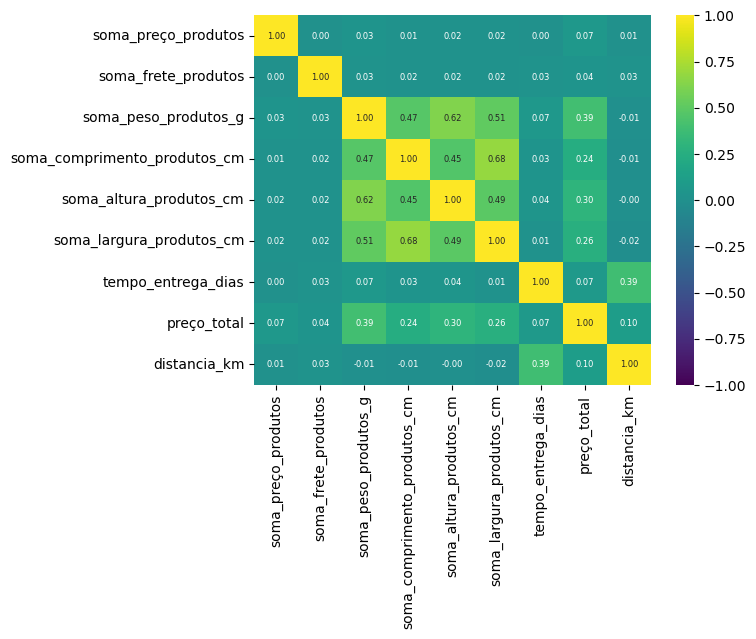

In [2043]:
#Área de Plotagem de Gráficos

heatmap1 = sns.heatmap(df_treino_graf.corr(),
            annot=True, fmt = '.2f', annot_kws={'size':6},
            vmin = -1,  vmax = 1,
            cmap = 'viridis')

# Predição
Seção de Elaboração do Modelo Preditivo

In [2044]:
df_treino = df_treino[['id_pedido', 'soma_preço_produtos', 'soma_frete_produtos', 'soma_peso_produtos_g', 'soma_comprimento_produtos_cm', 'soma_altura_produtos_cm', 'soma_largura_produtos_cm', 'preço_total', 'distancia_km', 'tempo_entrega_dias']].dropna()
df_treino

,id_pedido,soma_preço_produtos,soma_frete_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,preço_total,distancia_km,tempo_entrega_dias
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,650.0,28.0,9.0,14.0,72.19,301.336388,7.61
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,30000.0,50.0,30.0,40.0,259.83,589.921593,16.22
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,3050.0,33.0,13.0,33.0,216.87,312.838393,7.95
3,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,3750.0,35.0,40.0,30.0,218.04,646.931811,25.11
4,00048cc3ae777c65dbb7d2a0634bc1ea,21.90,12.69,450.0,24.0,8.0,15.0,34.59,161.775298,6.67
...,...,...,...,...,...,...,...,...,...,...
68313,fffb0b1a50e65c449020434fa835e078,4.90,10.96,100.0,60.0,16.0,11.0,15.86,146.751001,34.79
68314,fffb2ef8874127f75b52b643880fd7e0,17.90,22.06,200.0,25.0,5.0,18.0,39.96,877.492145,17.06
68315,fffb9224b6fc7c43ebb0904318b10b5f,220.00,136.76,1400.0,64.0,56.0,44.0,356.76,1727.581516,21.12
68316,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,967.0,21.0,24.0,19.0,116.85,339.199497,4.80


In [2045]:
#Tratamento de Outliers da df_treino
df_treino = df_treino[(df_treino['distancia_km'] <= 813)]


df_treino

,id_pedido,soma_preço_produtos,soma_frete_produtos,soma_peso_produtos_g,soma_comprimento_produtos_cm,soma_altura_produtos_cm,soma_largura_produtos_cm,preço_total,distancia_km,tempo_entrega_dias
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,650.0,28.0,9.0,14.0,72.19,301.336388,7.61
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,30000.0,50.0,30.0,40.0,259.83,589.921593,16.22
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,3050.0,33.0,13.0,33.0,216.87,312.838393,7.95
3,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,3750.0,35.0,40.0,30.0,218.04,646.931811,25.11
4,00048cc3ae777c65dbb7d2a0634bc1ea,21.90,12.69,450.0,24.0,8.0,15.0,34.59,161.775298,6.67
...,...,...,...,...,...,...,...,...,...,...
68309,fff7c4452f050315db1b3f24d9df5fcd,736.00,20.91,400.0,19.0,9.0,15.0,756.91,310.726584,6.84
68311,fff90cdcb3b2e6cfb397d05d562fd3fe,89.90,11.83,750.0,30.0,30.0,11.0,101.73,15.949957,4.72
68313,fffb0b1a50e65c449020434fa835e078,4.90,10.96,100.0,60.0,16.0,11.0,15.86,146.751001,34.79
68316,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,967.0,21.0,24.0,19.0,116.85,339.199497,4.80


In [2046]:
# Separando variáveis independentes (X) e dependente (y)
X_treino = df_treino[['soma_preço_produtos', 'soma_frete_produtos', 'soma_peso_produtos_g', 'soma_comprimento_produtos_cm', 'soma_altura_produtos_cm', 'soma_largura_produtos_cm', 'preço_total', 'distancia_km']]  # Variáveis independentes
y_treino = df_treino['tempo_entrega_dias']  # Variável dependente

# Dividindo df_treino em treino (70%) e validação (30%)
X_train, X_val, y_train, y_val = train_test_split(X_treino, y_treino, test_size=0.3, random_state=42)

# Inicializando e treinando o modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Validação do modelo nos dados de validação (df_treino)
y_pred_val = modelo_rf.predict(X_val)

# Avaliação: MSE e R²
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f'MSE na validação: {mse_val}')

# Teste com um novo DataFrame df_teste
X_teste = df_teste_graf  # Certifique-se de que as colunas estão corretas
y_pred_teste = modelo_rf.predict(X_teste)

# O modelo agora fez previsões no df_teste
print("Previsões no df_teste:", y_pred_teste)

MSE na validação: 57.65568516954989
Previsões no df_teste: [ 9.7762 17.0339  8.2205 ... 19.5214 14.1978 10.6073]


In [2047]:
df_teste = df_teste.drop(columns = {'id_produto', 'id_vendedor', 'soma_preço_produtos', 'soma_frete_produtos', 'categoria_produtos', 'soma_peso_produtos_g', 'soma_comprimento_produtos_cm', 'soma_altura_produtos_cm', 'soma_largura_produtos_cm', 'estado_cliente', 'cidade_cliente', 'latitude_aprox_cliente', 'longitude_aprox_cliente', 'prefixo_cep_vendedor', 'estado_vendedor', 'cidade_vendedor', 'latitude_aprox_vendedor', 'longitude_aprox_vendedor', 'id_cliente', 'preço_total', 'prefixo_cep_cliente', 'distancia_km'})
df_teste = df_teste.rename(columns = {'id_pedido': 'order_id'})
df_teste['delivery_time (days)'] = y_pred_teste
df_teste.to_csv('previsao.csv', index=False)
df_teste

,order_id,delivery_time (days)
0,00024acbcdf0a6daa1e931b038114c75,9.7762
1,000576fe39319847cbb9d288c5617fa6,17.0339
2,0005f50442cb953dcd1d21e1fb923495,8.2205
3,00063b381e2406b52ad429470734ebd5,11.3639
4,0006ec9db01a64e59a68b2c340bf65a7,20.9893
...,...,...
28147,fff8286f77788ab8b55b2e5747fa7dd8,16.0942
28148,fffbee3b5462987e66fb49b1c5411df2,19.6282
28149,fffc94f6ce00a00581880bf54a75a037,19.5214
28150,fffcd46ef2263f404302a634eb57f7eb,14.1978
